In [1]:
cd drive/MyDrive/data/

/content/drive/MyDrive/data


In [2]:
ls

 금융/                                   스마트폰_로그_데이터셋.json
 스마트폰_로그_데이터셋2.json            LightGBM/
 ab_data.csv                             sample_submission.csv
'AB_test and Cohort analytic data.csv'   tabular-playground-series-aug-2021.zip
 behavioral_pattern_analysis.csv         test.csv
 cookie_cats.csv                         train.csv
 FMbest.hdf5


In [3]:
# !unzip "tabular-playground-series-aug-2021.zip"

In [4]:
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

## 원래 데이터 세트는 대출 채무 불이행과 관련된 손실 계산을 다룹니다.

### 데이터 로드

In [5]:
# kaggle Tabular Playground Series - Aug 2021 참여
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

train.shape, test.shape, submission.shape

((250000, 102), (150000, 101), (150000, 2))

In [6]:
train.head(2)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.19366,5.79715,1.09999,14.8684,-0.275434,0.915721,167.800,-7.53414,4.23632,1.62956,1.14440,-0.303139,4.092090,3.22617,0.074799,0.259497,289.492,327.4650,5.38931,7.39479,-0.489950,20.2923,2.45660,1.447720,-10639.0,85.6005,-0.178513,2815,-234.772,1.83317,88.5605,0.367916,8.575340e+09,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.07217,65.1543,0.022504,-5.6068,1.79866,0.528068,6696.30,-0.562078,1.30102,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.0701,0.376622,-42.4399,26.85400,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.02020,1.78393,1.23100,10.1497,-0.018724,1.011280,127.401,11.82140,5.99681,-0.95385,1.37937,1.079530,0.711923,2.90602,0.051206,0.755122,140.893,29.5252,14.22960,3.53213,-0.405681,42.5357,1.43533,0.939771,138312.0,59.8810,-0.070959,1435,1046.880,1.56770,29.4306,2.455150,4.518200e+09,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.46258,43.1121,-0.060801,64.0455,2.35845,5.759690,3958.14,1.576610,-1.24179,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.3719,0.147973,-184.1320,7.90137,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3


### 데이터 확인

#### target 비율 확인

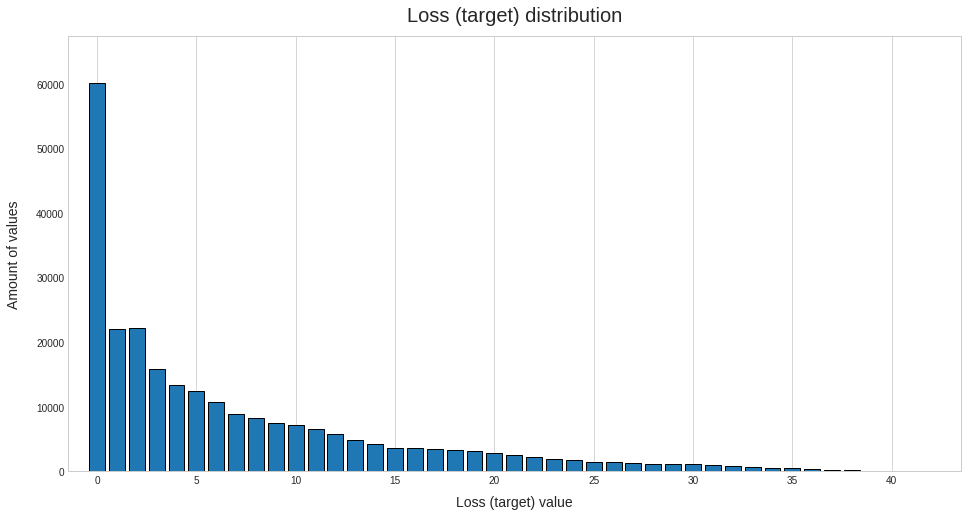

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.bar(train["loss"].value_counts().sort_index().index,
              train["loss"].value_counts().sort_index().values,
              edgecolor="black")
ax.set_title("Loss (target) distribution", fontsize=20, pad=15)
ax.set_ylabel("Amount of values", fontsize=14, labelpad=15)
ax.set_xlabel("Loss (target) value", fontsize=14, labelpad=10)

ax.margins(0.025, 0.12)
ax.grid(axis="y")

plt.show();

In [17]:
train.loss[train["loss"] <= 5].count() / train["loss"].count(), train.loss[train["loss"] <= 5].sum() / train["loss"].sum()

(0.584676, 0.13501714138117266)

전체 인원의 50%는 5달러 미만으로 Loss를 발생시켰으며, 전체 Loss에 13%에 해당 한다. 오히려 큰 금액으로 대출을 진행한 소수의 고객이 회사에 손실을 입히는 경향을 관측할 수 있었다. 

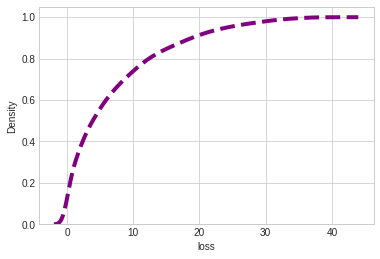

In [18]:
sns.kdeplot(train['loss'], cumulative=True, color = 'purple', linewidth=4, linestyle='--');

#### 통계적 분포 확인

In [7]:
train.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,1.190382,0.063664,0.095226,136.746037,8.034918,0.614930,0.752971,8.891112e+06,0.009645,0.041674,0.074226,0.321328,9.928838,3622.094586,7.413526,-0.480271,6.046948,137.635093,47223.903504,5.469358,7.155835,1.206363,6.461029,-0.018490,1.574449,136.830167,173.530314,6.283875,0.157174,0.502435,0.848153,1.424413,2.364249,0.134738,0.428217,115.320117,113.637385,7.092164,5.100105,-0.095555,87.844474,1.894125,0.847267,18152.791289,85.435271,0.488945,1003.602256,4302.990496,2.108318,86.370082,0.508351,3.882984e+09,68.257992,4.672625,0.214381,1.194280,0.474751,0.216206,0.939638,1.668524,0.918009,68.939811,0.012219,64.709567,2.239319,3.495883,4430.718917,-0.159048,0.734153,6.416185,1.185112,1.973585,0.014504,-0.455453,0.245507,3.893001,4.400483,253.135672,0.258360,7.154004,7.759941,0.581002,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,0.099700,2.433281,0.935765,14.422095,5.487786,1.619192,0.626172,8.508967e+06,0.103460,0.684975,0.739724,0.337792,5.661423,6328.918702,3.740530,0.712486,3.172873,15.710846,36013.179913,7.716520,3.443207,0.134848,2.451240,0.787275,1.109286,14.816130,201.166381,3.530354,1.728653,1.789297,0.627197,6.473798,1.227176,0.084534,0.182512,104.562112,100.874754,3.647758,3.211041,0.792784,70.327252,0.706721,0.684846,36933.551576,17.757335,1.004355,802.554355,7446.656939,0.945911,16.988538,0.981327,2.279121e+09,35.655549,2.913057,0.101787,0.099982,0.218068,0.098362,0.732696,10.179813,2.854904,38.940318,0.090087,31.343334,0.735150,1.935741,8050.232085,0.840284,3.344094,2.016620,0.101610,0.689412,0.025504,0.228070,0.700630,1.592608,1.089594,338.972888,0.703873,3.698234,11.378365,0.445022,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,0.934037,-10.261200,-1.858720,108.086000,-2.115510,-8.648960,-1.805330,-1.173084e+06


Max 값이 큰 feature 
f1, f2, f4, f6, f8, f13, f14, f22, f35, f44,f45,f49, f52, f56, f70, f72f, 75, f86이며, 튀는 값들이 관측된다.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


#### null, dtypes, nunique 확인

feature가 너무 많아 info가 축약형으로 출력이 된다. 이에, dataframe을 만들어서 한번 확인해보도록 하겠습니다. 

In [9]:
checking = pd.DataFrame()
checking["null"] = train.isnull().sum()
checking["dtypes"] = train.dtypes
checking["nunique"] = train.nunique()

In [10]:
checking.T

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dtypes,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
nunique,250000,223000,289,232906,225458,235741,212229,226317,222121,237743,46865,232697,218418,49903,213236,172950,217939,247476,235521,232717,234220,230100,202252,236018,212420,208679,218414,60938,37471,233026,213166,55830,209976,228180,202534,56061,228366,218728,217056,170048,194701,235988,160884,199479,206220,218830,219032,213531,222006,226531,217956,127302,173896,240586,182120,235100,4726,238404,139337,171536,234516,212504,214358,219965,185578,47629,213963,182769,178144,235046,177811,214139,235742,215626,155576,209309,236086,222626,198607,204980,46633,141450,228402,217638,235559,197902,154249,329,235371,213520,232928,221874,238119,206920,139448,231941,235480,168844,215966,148285,213501,43


checking을 통해서 확인한 결과, f1 같은 경우, int이고 nunique도 25000 row에 비해 적은 값이 관측되었다. 혹시, 카테고리형 데이터가 int로 변환되어 있는 것은 아닌가 하는 추측을 해보았습니다. 일단, dtypes이 int형을 관측해보고, nunique가 1000개 이하인 feature가 있는지 관측해 보겠습니다. 

In [11]:
checking[checking["dtypes"] == "int64"].T

,id,f1,f16,f27,f55,f86,loss
null,0,0,0,0,0,0,0
dtypes,int64,int64,int64,int64,int64,int64,int64
nunique,250000,289,247476,37471,4726,329,43


In [12]:
checking[checking["nunique"] < 1000].T

,f1,f86,loss
null,0,0,0
dtypes,int64,int64,int64
nunique,289,329,43


int와 nunique를 관측해 본 결과, int형이라고 해서 모두 카테고리형으로 관측할 수는 없음을 확인하였습니다.  
카테고리형 데이터로 의심이 되는 feature는 f1, f55, f86 정도로 확인이 됩니다.  
그래프를 통해서 확실히 카테코리형 데이터를 구분해보도록 하겠습니다. 

여기서 활용할 그래프는 Kdeplot(kdeplot : kernel density estimation )입니다.  
  
density estimation(밀도추정) : (관측된) 데이터들의 분포로부터 원래 변수의 (확률) 분포 특성을 추정하고자 하는 것을 의미합니다. 
  
그러나, 우리가 데이터에 대한 사전 정보를 아는 것은 거의 없기 때문에 사전 정보나 지식 없이 순수하게 관측된 데이터만으로 확률밀도함수를 추정해야 하는데 이를 non-parametric density estimation라 부릅니다. non-parametric density estimation의 대표적인 예가 히스토그램인데 히스토그램은 아래와 같이 3가지의 단점이 있습니다.   
 - 1) bin의 경계에서 불연속성이 나타난다는 점,   
 - 2) bin의 크기 및 시작 위치에 따라서 히스토그램이 달라진다는 점,   
 - 3) 고차원(high dimension) 데이터에는 메모리 문제 등으로 사용하기 힘들다는 점 등의 문제점을 갖습니다.  

이러한 문제점을 해결하기 위한 그래프가 kdeplot입니다.   

즉KDE(Kernel Density Estimation)를 통해 얻은 확률밀도함수는 히스토그램 확률밀도함수를 스무딩(smoothing)한 것이 kdeplot입니다. 


여기서 각각의 feature마다 그래프가 그려지는데, 2봉, 3봉으로 출력이 되는 그래프는 카테고리형으로 추정할 수 있습니다. 

In [13]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)
background_color = "#f6f5f5"

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.2, 1.4, 'Features Distribution', fontsize=10, fontweight='bold')
ax0.text(-0.2, 1.3, 'f0-f24', fontsize=10, fontweight='light')        

features = list(train.columns[1:26])

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train[col], zorder=2, alpha=1, linewidth=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(5)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(5)
    run_no += 1

plt.show()

In [14]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-4, 0.165, 'Features Distribution ', fontsize=10, fontweight='bold')
ax0.text(-4, 0.15, 'f25-f49', fontsize=5, fontweight='light')

features = list(train.columns[26:51])

background_color = "#f6f5f5"

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train[col], zorder=2, alpha=1, linewidth=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(5)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(5)
    run_no += 1

plt.show()

In [15]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')

gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-1, 1.8, 'Features Distribution ', fontsize=10, fontweight='bold')
ax0.text(-1, 1.65, 'f50-f74', fontsize=6, fontweight='light')

features = list(train.columns[51:76])

background_color = "#f6f5f5"

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train[col], zorder=2, alpha=1, linewidth=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=10, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=10, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(10)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(10)
    run_no += 1

plt.show()

예상했던 것과 비슷하게 봉우리가 여러 개인 feature가 다수 확인되었습니다. 이들은 카테고리형 데이터일 확률이 있습니다.  
그러나, 해당 데이터는 고객의 요청에 따라 숫자로 치환되었으며, 일종의 암호화되어 있습니다. 이를, 다시 라벨링 하는 작업은 오히려 데이터 분석하는데 방해된다고 생각하여 이 상태 그대로 모델링을 진행해보겠습니다. 

### 모데링

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor, LGBMClassifier

X = train.drop(columns=["loss"])
y = train["loss"]

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((200000, 101), (50000, 101), (200000,), (50000,))

#### base model : linearRegression

In [42]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = base_model.predict(X_val)
mean_squared_error(y_val, y_pred)

62.02830718991018

#### main model : LGBMRegressor

##### LightGBM 사용이유
- 실험 데이터가 10,000이상 row를 가지고 있습니다. 
- 학습속도가 빠른 알고리즘이 필요하였습니다. 
-  Light GBM은 leaf-wise인 반면 xgboost 등 다른 알고리즘은 level-wise여서 과적합되기 쉽습니다. 
- 즉, 학습이 진행될수록max delta loss를 가진 leaf를 선택하게 되게 됩니다. 동일한 leaf를 확장할 때,   
 leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 loss, 손실을 줄일 수 있습니다.
  

In [44]:
lgbm_base_model = LGBMRegressor(random_state=42)
lgbm_base_model.fit(X_train, y_train, verbose=False)
y_pred = lgbm_base_model.predict(X_val)
mean_squared_error(y_val, y_pred)

61.428610894843985

##### StratifiedKFold 적용 
- StratifiedKFold을 적용하니 성능이 갑자기 상승하였습니다. 
- StratifiedKFold는 k의 fold로 나누어질 때 타겟의 비율을 일정하게 유지해주는 역할을 합니다. 

In [24]:
folds = 3
features = list(train.columns[1:101])

In [25]:
train_pred = np.zeros((250000,))

# StratifiedKFold를 사용하는 방법 -> 공식문서 참고 
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
  X_train, X_val = X[train_idx], X[val_idx]
  y_train, y_val = y[train_idx], y[val_idx]

  lgbm_model = LGBMRegressor(random_state=42)
  lgbm_model =  lgbm_model.fit(X_train, y_train, verbose=False)

  y_pred = lgbm_model.predict(X_val)
  train_pred[val_idx] = y_pred
  print(f'Fold {fold} RMSE: ', mean_squared_error(y_val, y_pred, squared=False))
  
print(f'Train Accuracy: ', mean_squared_error(train['loss'], train_pred, squared=False))

Fold 0 RMSE:  7.86281354960864
Fold 1 RMSE:  7.86647679658902
Fold 2 RMSE:  7.862892372813356
Fold 3 RMSE:  7.8660110353057755
Fold 4 RMSE:  7.863381597350113
Train Accuracy:  7.864315231814221


##### 전처리 방법
 - StandardScaler 따라서 이상치가 있는 경우 균형 잡힌 기능 척도를 보장할 수 없습니다.
 - MinMaxScaler이상값의 존재에 매우 민감합니다.
 - RobustScaler및 QuantileTransformer트레이닝 세트에서 아웃 라이어를 추가하거나 제거하는 것이 거의 동일한 변화를 산출 할 것이라는 점에서 특이점에 강합니다. 그러나, 사전 정의된 범위의 경계로 값들은 변환하여 모든 이상치을 축소합니다. 

 - 이에, PowerTransformer은 분산을 안정화하고 왜도를 최소화하기 위해 데이터를 가우스와 유사하게 만들기 위해 각 기능에 거듭제곱 변환을 적용하는 PowerTransformer를 적용하였습니다. 

##### hyperparameter tuning : optuna

In [98]:
from sklearn.preprocessing import PowerTransformer

def objective(trial, X, y):
    # 데이터 분리 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42, shuffle=True)

    # 전처리 방법 선택 및 적용 
    pt = PowerTransformer()
    X_train.iloc[:, :] = pt.fit_transform(X_train)
    X_val.iloc[:, :] = pt.transform(X_val)

    # 과적합을 방지하는 방향으로 하이퍼파라미터 튜닝
    params = {
    "tree_method": "gpu_hist",
    'n_estimators': trial.suggest_int('n_estimators', 500, 2000, 100),
    "booster": 'gbtree',
    "reg_lambda": trial.suggest_int("reg_lambda", 1, 100),
    "reg_alpha": trial.suggest_int("reg_alpha", 1, 100),
    "subsample": trial.suggest_float("subsample", 0.2, 1.0, step=0.1),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0, step=0.1),
    "max_depth": trial.suggest_int("max_depth", 3, 9),
    "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
    "learning_rate": 0.01,
    "gamma": trial.suggest_float("gamma", 0, 20)
}
    # Set up the CV
    eval_set = [(X_val, y_val)]
    fit_params = dict(eval_set=eval_set, eval_metric='rmse', 
                      early_stopping_rounds=100, verbose=False)
    # 모델 선정 및 params 입력 
    model = LGBMRegressor(**params,random_state=42)
    
    # 모델 훈련 
    model.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose = False)

    # 모델 예측 
    y_preds = model.predict(X_val)

    # rmse 계산 
    rmse = np.sqrt(mean_squared_error(y_val, y_preds))
    
    return rmse

In [99]:
# logging_callback 함수 : 성능이 좋은 횟수에 한하여 리콜해주는 함수 
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "Trial {} finished with best value: {}. ".format(
            frozen_trial.number,
            frozen_trial.value
            )
        )

In [100]:
from optuna.samplers import TPESampler

optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(sampler=TPESampler(seed=1121218), direction='minimize', study_name='lgbm')
func = lambda trial: objective(trial, X, y)

study.optimize(func, callbacks=[logging_callback])

Trial 0 finished with best value: 7.879991786845412. 
Trial 2 finished with best value: 7.875351419076626. 
Trial 11 finished with best value: 7.874844127472588. 
Trial 12 finished with best value: 7.8747922709676725. 
Trial 13 finished with best value: 7.874149378128962. 
Trial 21 finished with best value: 7.874063966927995. 
Trial 32 finished with best value: 7.873975413144746. 
Trial 33 finished with best value: 7.8727183887912. 
Trial 34 finished with best value: 7.872632246043323. 
Trial 36 finished with best value: 7.871683141826551. 


In [101]:
print("Best trial: 20")
print(f"\twith value: {study.best_value:.5f}")
print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

Best trial: 20
	with value: 7.87168
	Best params:
		n_estimators: 2000
		reg_lambda: 100
		reg_alpha: 7
		subsample: 1.0
		colsample_bytree: 0.30000000000000004
		max_depth: 9
		min_child_weight: 10
		gamma: 18.33239951135272


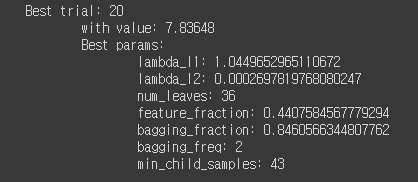

In [102]:
params = study.best_trial.params
params['metric'] = 'RMSE'
params['bootstrap_type']= 'gbdt'
params['random_state'] = 42
test_preds=None


kf = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 42)
for fold, (tr_index , val_index) in enumerate(kf.split(X.values , y.values)):
    
    print("⁙" * 10)
    print(f"Fold {fold + 1}")
    
    X_train,X_val = X.values[tr_index] , X.values[val_index]
    y_train,y_val = y.values[tr_index] , y.values[val_index]

    # 전처리 방법 선택 및 적용 
    pt = PowerTransformer()
    X_train.iloc[:, :] = pt.fit_transform(X_train)
    X_val.iloc[:, :] = pt.transform(X_val)
        
    eval_set = [(X_val, y_val)]
    
    model =LGBMRegressor(**params)
    model.fit(X_train, y_train, eval_set = eval_set, verbose = False)
    
    train_preds = model.predict(X_train)    
    y_preds = model.predict(X_val)
    
    print(np.sqrt(mean_squared_error(y_val, y_preds)))
    
    if test_preds is None:
        test_preds = model.predict(test.values)
    else:
        test_preds += model.predict(test.values)

print("-" * 50)
print("Training Done")

test_preds /= 10

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
7.872617261215248
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
7.875810027389276
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
7.891207870342533
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
7.872977540724456
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
7.888122821320464
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
7.883682457415327
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
7.887942534778048
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
7.888091148942576
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
7.878326680361546
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
7.8726536270139205
--------------------------------------------------
Training Done


In [103]:
print(np.sqrt(mean_squared_error(y_train, train_preds)))
print(np.sqrt(mean_squared_error(y_val, y_preds)))

6.459749924949527
7.8726536270139205


In [104]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

In [105]:
submission['loss']=test_preds
submission.to_csv("submission.csv",index=False)

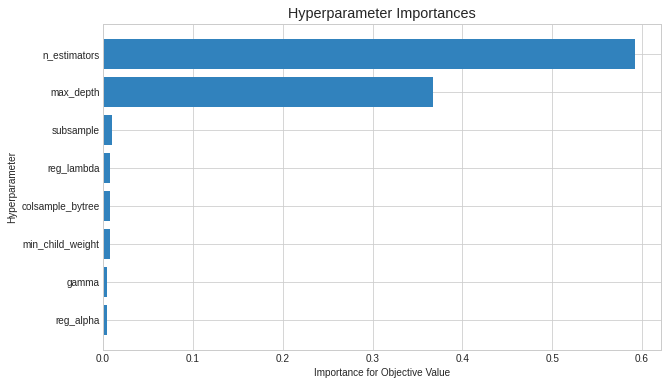

In [106]:
from matplotlib import rcParams
from optuna.visualization.matplotlib import plot_param_importances

rcParams['figure.figsize'] = 10, 6
plot_param_importances(study);

In [108]:
!pip install eli5

     |████████████████████████████████| 106 kB 7.9 MB/s 


In [109]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0038 ± 0.0009,f52
0.0037 ± 0.0008,f81
0.0027 ± 0.0012,f25
0.0026 ± 0.0013,f69
0.0019 ± 0.0006,f57
0.0016 ± 0.0010,f48
0.0015 ± 0.0006,f50
0.0014 ± 0.0010,f3
0.0014 ± 0.0007,f70
0.0013 ± 0.0009,f9


In [110]:
!pip install shap

     |████████████████████████████████| 356 kB 9.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491650 sha256=024aae730c56af454c3bc9683739e0956e0216c420333781b6bd51cc5de631a6
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


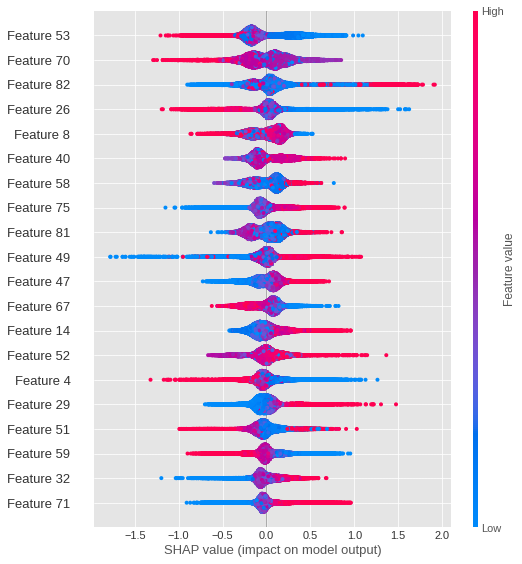

In [113]:
import shap

# Choose a smaller subset of the validation data
small_valid = X_val

# Create the explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(small_valid)

shap.summary_plot(shap_values, small_valid);

In [121]:
def objective3(trial,data=X,target=y):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=42)
    params = {
        "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
        "subsample": trial.suggest_discrete_uniform("subsample",0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree",0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",5,20),
        "min_child_weight": trial.suggest_int("min_child_weight",5,20),
    }
    model = xgb.XGBRegressor(**params, tree_method='gpu_hist', random_state=42)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose = False,eval_metric='rmse')

    y_preds = model.predict(X_test)
    loss = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return loss

In [122]:
study = optuna.create_study(direction='minimize')
study.optimize(objective3, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[12:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [123]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

In [126]:

xgb_params = study.best_trial.params
xgb_params['tree_method'] = 'gpu_hist'
xgb_params['random_state'] = 42
test_preds=None

print("Training........")

kf = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 42)
for fold, (tr_index , val_index) in enumerate(kf.split(X.values , y.values)):
    
    print("⁙" * 10)
    print(f"Fold {fold + 1}")
    
    x_train,x_val = X.values[tr_index] , X.values[val_index]
    y_train,y_val = y.values[tr_index] , y.values[val_index]
        
    eval_set = [(x_val, y_val)]
    
    model =xgb.XGBRegressor(**xgb_params)
    model.fit(x_train, y_train, eval_set = eval_set, verbose = False)
    
    train_preds = model.predict(x_train)    
    val_preds = model.predict(x_val)
    
    print(np.sqrt(mean_squared_error(y_val, val_preds)))
    
    if test_preds is None:
        test_preds = model.predict(test.values)
    else:
        test_preds += model.predict(test.values)

print("-" * 50)
print("\033[97mTraining Done")

test_preds /= 10

Training........
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
[14:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.846439545907745
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
[14:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.851039286531461
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
[14:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.847699237104786
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
[14:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.840559691877517
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
[14:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.850584011521086
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
[14:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.85379076409959
⁙⁙⁙⁙⁙⁙

In [127]:
submission = pd.read_csv("sample_submission.csv")
submission['loss']=test_preds
submission.to_csv("sub3.csv",index=False)